In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/walmart-recruiting-store-sales-forecasting/train.csv.zip
/kaggle/input/walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip
/kaggle/input/walmart-recruiting-store-sales-forecasting/stores.csv
/kaggle/input/walmart-recruiting-store-sales-forecasting/features.csv.zip
/kaggle/input/walmart-recruiting-store-sales-forecasting/test.csv.zip


# 1. 데이터 불러오기

In [2]:
train = pd.read_csv('/kaggle/input/walmart-recruiting-store-sales-forecasting/train.csv.zip')
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [3]:
test = pd.read_csv('/kaggle/input/walmart-recruiting-store-sales-forecasting/test.csv.zip')
test

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [4]:
store = pd.read_csv('/kaggle/input/walmart-recruiting-store-sales-forecasting/stores.csv')
store.head(5)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


# 2. Store 데이터 추가해주기 (Join 사용)

In [5]:
train = pd.merge(train, store,on='Store', how='left') #만들어준 적 없는 변수는 따옴표로 묶어주기 
test = pd.merge(test, store,on='Store', how='left') 



In [6]:
display(train, test)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315
...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221
421566,45,98,2012-10-05,628.10,False,B,118221
421567,45,98,2012-10-12,1061.02,False,B,118221
421568,45,98,2012-10-19,760.01,False,B,118221


,Store,Dept,Date,IsHoliday,Type,Size
0,1,1,2012-11-02,False,A,151315
1,1,1,2012-11-09,False,A,151315
2,1,1,2012-11-16,False,A,151315
3,1,1,2012-11-23,True,A,151315
4,1,1,2012-11-30,False,A,151315
...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,B,118221
115060,45,98,2013-07-05,False,B,118221
115061,45,98,2013-07-12,False,B,118221
115062,45,98,2013-07-19,False,B,118221


# 3. Type 변수 살펴보기 (Groupby, Boxplot) 

In [7]:
train.groupby('Type')['Weekly_Sales'].mean()

Type
A    20099.568043
B    12237.075977
C     9519.532538
Name: Weekly_Sales, dtype: float64

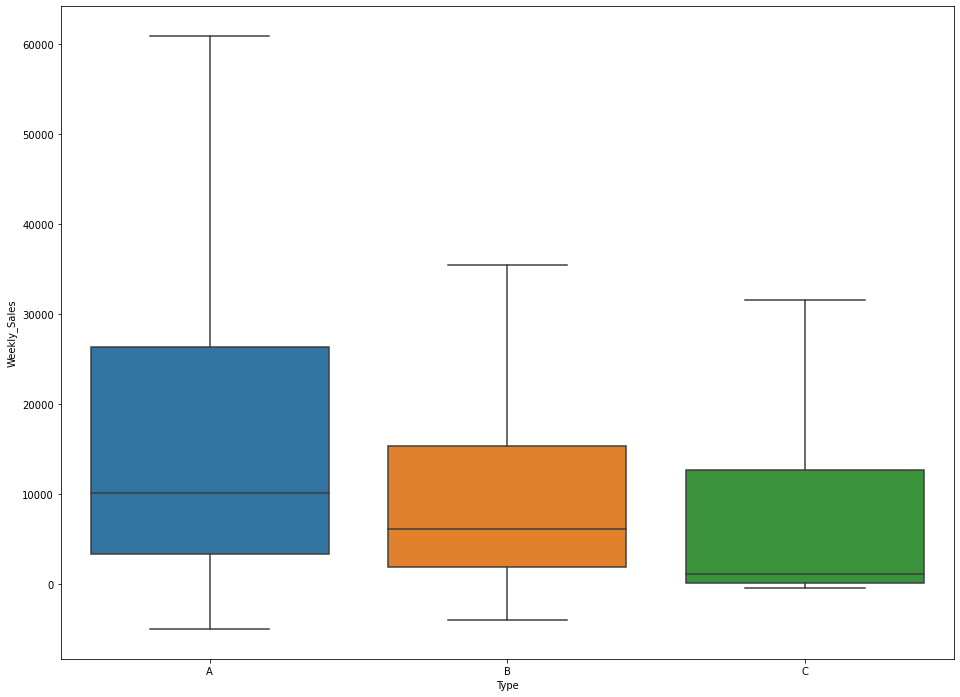

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,12))
sns.boxplot(train['Type'], train['Weekly_Sales'], showfliers=False)

# 4. 날짜 컬럼 DateTime으로 바꾸기

In [9]:

#3가지 방법으로 바꿀 수 있음
#train['Date'] = train['Date'].astype('datetime64')


train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])
#train = pd.read_csv('주소', parse_dates = ["Date"]) <- parse_dates 사용 방법

train.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Type                    object
Size                     int64
dtype: object

In [10]:
train['Year'] = train['Date'].dt.year 
test['Year'] = test['Date'].dt.year


#esc + f 찾아바꾸기 

train.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Year
0,1,1,2010-02-05,24924.50,False,A,151315,2010
1,1,1,2010-02-12,46039.49,True,A,151315,2010
2,1,1,2010-02-19,41595.55,False,A,151315,2010
3,1,1,2010-02-26,19403.54,False,A,151315,2010
4,1,1,2010-03-05,21827.90,False,A,151315,2010


In [11]:
train['Month'] = train['Date'].dt.month 
test['Month'] = test['Date'].dt.month

In [12]:
train['Day'] = train['Date'].dt.day
test['Day'] = test['Date'].dt.day

In [13]:
train['Week'] = train['Date'].dt.week
test['Week'] = test['Date'].dt.week

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


# 5. 날짜 변수 중 Month 변수 살펴보기

* # BoxPlot

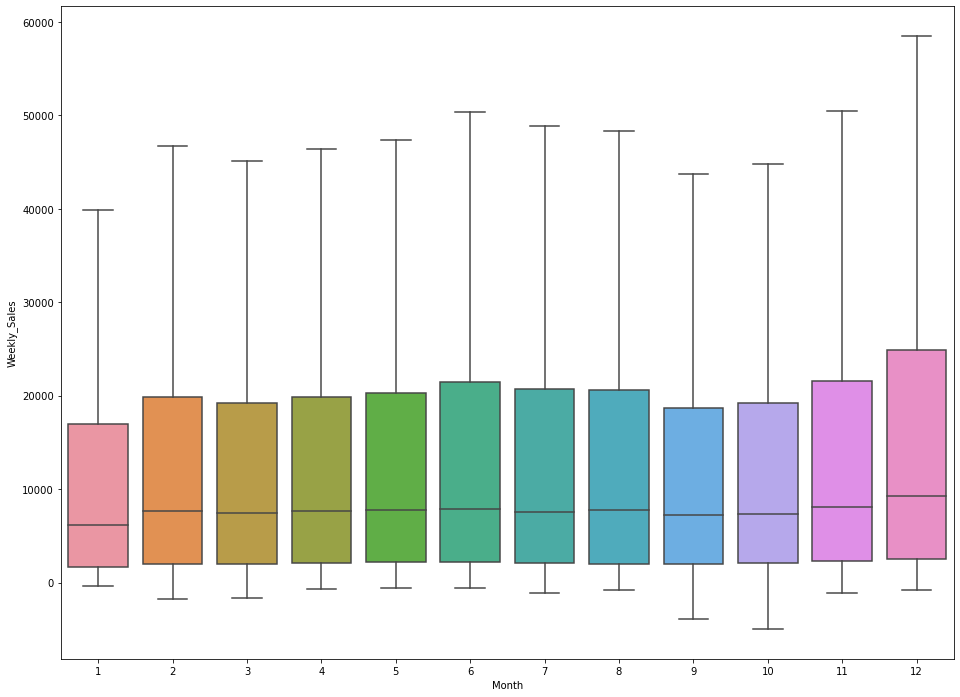

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,12))
sns.boxplot(train['Month'], train['Weekly_Sales'], showfliers=False)
#12월의 판매량이 확연하게 높다는 걸 알 수 있음 
#어떤 공휴일이 실제 christmas나 blackfriday인 걸 학습할 수 있어서 점수 확 올라감 

* #  Groupby


In [15]:
#day당 데이터가 충분하기 떄문에 신뢰도가 높음 
train.groupby('Day')['Weekly_Sales'].mean()
#판매량이 확 올라가는 지점 - Promotion 효과 

Day
1     15438.693561
2     16282.825224
3     16243.591840
4     16262.123390
5     16152.185352
6     16540.152518
7     15851.075764
8     16026.260550
9     16563.236628
10    16684.753968
11    15946.176870
12    15769.983633
13    15358.628217
14    14843.544775
15    15476.565690
16    16400.916009
17    16890.881861
18    15914.848035
19    15634.121093
20    15236.067426
21    14987.074671
22    15696.588300
23    17183.530448
24    17732.369226
25    16816.726353
26    16742.479327
27    14908.182971
28    15056.847856
29    15117.011770
30    15038.411334
31    14833.557736
Name: Weekly_Sales, dtype: float64

# 6. Categorical Variables (Type) 처리하기

- Column이 너무 많으면 Tree 모델 취약함 -> one hot encoding 하면 점수가 더 낮아지기도

- Label Encoding을 사용할 것 

In [16]:
train = train.replace({'A':0, 'B':1,'C':2})

In [17]:
test = test.replace({'A':0, 'B':1,'C':2})

In [18]:
# 1. 전처리 단계
# 1) 문자형은 학습이 불가하기 때문에 제외하고 시작 & 2)train과 test의 차원(독립변수,x변수)이 같아야 함
train2 = train.drop(columns=["Date", "Weekly_Sales"])
test2 = test.drop(columns=["Date"])

display(train2,test2)

,Store,Dept,IsHoliday,Type,Size,Year,Month,Day,Week
0,1,1,False,0,151315,2010,2,5,5
1,1,1,True,0,151315,2010,2,12,6
2,1,1,False,0,151315,2010,2,19,7
3,1,1,False,0,151315,2010,2,26,8
4,1,1,False,0,151315,2010,3,5,9
...,...,...,...,...,...,...,...,...,...
421565,45,98,False,1,118221,2012,9,28,39
421566,45,98,False,1,118221,2012,10,5,40
421567,45,98,False,1,118221,2012,10,12,41
421568,45,98,False,1,118221,2012,10,19,42


,Store,Dept,IsHoliday,Type,Size,Year,Month,Day,Week
0,1,1,False,0,151315,2012,11,2,44
1,1,1,False,0,151315,2012,11,9,45
2,1,1,False,0,151315,2012,11,16,46
3,1,1,True,0,151315,2012,11,23,47
4,1,1,False,0,151315,2012,11,30,48
...,...,...,...,...,...,...,...,...,...
115059,45,98,False,1,118221,2013,6,28,26
115060,45,98,False,1,118221,2013,7,5,27
115061,45,98,False,1,118221,2013,7,12,28
115062,45,98,False,1,118221,2013,7,19,29


# 7. Training하기 

In [19]:
%%time 
# 실행시간을 확인할 수 있음
# tree모델 -> RandomForest모델을 이용한다. 랜덤포레스트 모델에서는 앙상블 기법?을 활용하기 때문에 저렇게 import함.
from sklearn.ensemble import RandomForestRegressor 
# rf라는 이름 이용시 as 사용하지 않고 클래스로부터 변수 초기화하는 이유는 옵션을 이용하기 위해서.
rf = RandomForestRegressor(n_jobs=-1) # 기본 프로세서는 4개 * -1:전체
rf.fit(train2,train['Weekly_Sales'])
result = rf.predict(test2)
result

CPU times: user 4min 12s, sys: 4.05 s, total: 4min 16s
Wall time: 1min 7s


array([35236.5249, 20483.0211, 19372.2014, ...,   765.5552,   778.506 ,
         686.8193])

In [20]:
test['Weekly_Sales'] = result
test.head(50)

,Store,Dept,Date,IsHoliday,Type,Size,Year,Month,Day,Week,Weekly_Sales
0,1,1,2012-11-02,False,0,151315,2012,11,2,44,35236.5249
1,1,1,2012-11-09,False,0,151315,2012,11,9,45,20483.0211
2,1,1,2012-11-16,False,0,151315,2012,11,16,46,19372.2014
3,1,1,2012-11-23,True,0,151315,2012,11,23,47,20493.1644
4,1,1,2012-11-30,False,0,151315,2012,11,30,48,27178.7511
5,1,1,2012-12-07,False,0,151315,2012,12,7,49,32381.9608
6,1,1,2012-12-14,False,0,151315,2012,12,14,50,45918.7391
7,1,1,2012-12-21,False,0,151315,2012,12,21,51,48131.3562
8,1,1,2012-12-28,True,0,151315,2012,12,28,52,24297.4469
9,1,1,2013-01-04,False,0,151315,2013,1,4,1,16647.1122


In [21]:
# Submission

# Submission

In [22]:
sub = pd.read_csv('/kaggle/input/walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip')
sub

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0
...,...,...
115059,45_98_2013-06-28,0
115060,45_98_2013-07-05,0
115061,45_98_2013-07-12,0
115062,45_98_2013-07-19,0


In [23]:
sub['Weekly_Sales'] = result
sub

,Id,Weekly_Sales
0,1_1_2012-11-02,35236.5249
1,1_1_2012-11-09,20483.0211
2,1_1_2012-11-16,19372.2014
3,1_1_2012-11-23,20493.1644
4,1_1_2012-11-30,27178.7511
...,...,...
115059,45_98_2013-06-28,677.6161
115060,45_98_2013-07-05,683.0943
115061,45_98_2013-07-12,765.5552
115062,45_98_2013-07-19,778.5060


In [24]:
sub.to_csv('sub.csv', index=False)